In [20]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import _pickle as pickle 
from pickle import dump, load
from keras.layers import Dropout
from keras import regularizers

In [2]:
#Loading dataset

In [3]:
df = pd.read_csv('dataset.csv')  #error_bad_lines=False

In [4]:
df

,idFrame,Xnose1,Ynose1,Xnose2,Ynose2,Xneck1,Yneck1,Xneck2,Yneck2,XRshoulder1,...,DistNoseRKnee2,DistLHipLWrist2,DistLHipRWrist2,DistRHipLWrist2,DistRHipRWrist2,DistLHipLKnee2,DistLHipRKnee2,DistRHipLKnee2,DistRHipRKnee2,Violence
0,0,120,64,0,0,136,64,0,0,152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,22,0,0,0,0,80,96,128,88,88,...,0.000000,0.000000,0.000000,0.000000,0.000000,64.498062,64.498062,75.471849,75.471849,0
2,29,0,0,0,0,72,96,160,96,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,89.442719,89.442719,89.442719,89.442719,0
3,82,0,0,200,72,0,0,216,80,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,84,0,0,176,40,208,88,200,56,0,...,106.733312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,12482,40,64,152,48,40,80,160,72,16,...,0.000000,81.584312,145.986301,58.240879,122.376468,0.000000,0.000000,0.000000,0.000000,1
2404,12483,152,48,40,64,160,72,40,80,144,...,0.000000,112.000000,0.000000,136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2405,12484,152,48,40,64,160,72,40,80,144,...,0.000000,105.223572,0.000000,136.235091,0.000000,0.000000,0.000000,0.000000,0.000000,1
2406,12485,152,48,40,64,160,72,40,80,144,...,0.000000,112.285351,0.000000,136.235091,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [7]:
dataset = df.values

In [8]:
dataset

array([[0.00000000e+00, 1.20000000e+02, 6.40000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.20000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        7.54718491e+01, 7.54718491e+01, 0.00000000e+00],
       [2.90000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        8.94427191e+01, 8.94427191e+01, 0.00000000e+00],
       ...,
       [1.24840000e+04, 1.52000000e+02, 4.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.24850000e+04, 1.52000000e+02, 4.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.24860000e+04, 1.52000000e+02, 4.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [9]:
X = dataset[:,0:99] #Input features, the first 99 columns of the dataset

In [10]:
X

array([[    0.        ,   120.        ,    64.        , ...,
            0.        ,     0.        ,     0.        ],
       [   22.        ,     0.        ,     0.        , ...,
           64.49806199,    75.47184906,    75.47184906],
       [   29.        ,     0.        ,     0.        , ...,
           89.4427191 ,    89.4427191 ,    89.4427191 ],
       ...,
       [12484.        ,   152.        ,    48.        , ...,
            0.        ,     0.        ,     0.        ],
       [12485.        ,   152.        ,    48.        , ...,
            0.        ,     0.        ,     0.        ],
       [12486.        ,   152.        ,    48.        , ...,
            0.        ,     0.        ,     0.        ]])

In [12]:
Y = dataset[:,99] #The feature i aim to predict

In [13]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X) 
#scaler for make the range between 0 e 1

In [16]:
X_scale

array([[0.        , 0.55555556, 0.34782609, ..., 0.        , 0.        ,
        0.        ],
       [0.00176197, 0.        , 0.        , ..., 0.37921671, 0.4026325 ,
        0.41611507],
       [0.0023226 , 0.        , 0.        , ..., 0.52587895, 0.47716528,
        0.49314365],
       ...,
       [0.99983982, 0.7037037 , 0.26086957, ..., 0.        , 0.        ,
        0.        ],
       [0.99991991, 0.7037037 , 0.26086957, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.7037037 , 0.26086957, ..., 0.        , 0.        ,
        0.        ]])

Splitting the dataset, val_and_test size will be 30% of the overall dataset, then we split again in two parts
test and val.

In [17]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [18]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [19]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1685, 99) (361, 99) (362, 99) (1685,) (361,) (362,)


# Building the neural network

In [31]:
model_3 = Sequential([  
    Dense(4096, activation='relu', 
    kernel_regularizer=regularizers.l2(0.01),
    input_shape=(99,)),
    Dropout(0.3),
    Dense(2048, activation='relu',
    kernel_regularizer=regularizers.l2(0.01)), 
    Dropout(0.3),
    Dense(1024,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(512, activation='relu', 
    kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1, activation='sigmoid', 
    kernel_regularizer=regularizers.l2(0.01)),])

In [32]:
model_3.compile(optimizer='adam',      
                loss='binary_crossentropy',    
                metrics=['accuracy'])

In [33]:
hist_3 = model_3.fit(X_train, Y_train,batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1685 samples, validate on 361 samples
Epoch 1/100
1685/1685 [==============================] - 16s 9ms/step - loss: 11.9863 - accuracy: 0.7869 - val_loss: 1.0256 - val_accuracy: 0.8975
Epoch 2/100
1685/1685 [==============================] - 14s 9ms/step - loss: 0.5882 - accuracy: 0.9395 - val_loss: 0.4330 - val_accuracy: 0.9557
Epoch 3/100
1685/1685 [==============================] - 14s 9ms/step - loss: 0.4396 - accuracy: 0.9306 - val_loss: 0.3494 - val_accuracy: 0.9695
Epoch 4/100
1685/1685 [==============================] - 14s 9ms/step - loss: 0.3678 - accuracy: 0.9484 - val_loss: 0.3506 - val_accuracy: 0.9668
Epoch 5/100
1685/1685 [==============================] - 15s 9ms/step - loss: 0.3172 - accuracy: 0.9757 - val_loss: 0.2853 - val_accuracy: 0.9834
Epoch 6/100
1685/1685 [==============================] - 14s 9ms/step - loss: 0.3134 - accuracy: 0.9668 - val_loss: 0.3651 - val_accuracy: 0.9307
Epoch 7/100
1685/1685 [==============================] - 14s 9ms/step - loss

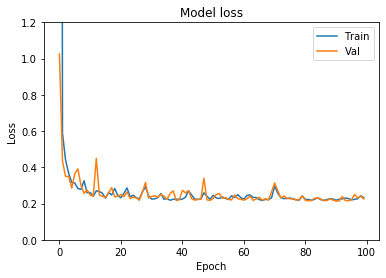

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

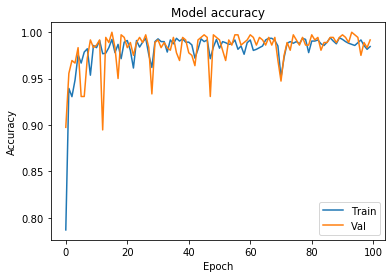

In [35]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Save the model

In [36]:
model_3.save('models/model_NN.h5')

In [37]:
score = model_3.evaluate(X_train, Y_train, verbose=1)

1685/1685 [==============================] - 2s 1ms/step


In [38]:
score

[0.2149587182156764, 0.9988130331039429]